In [1]:
import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data.to_csv("/home/jash/Desktop/petplan/Profitability.csv")
Y=data['LossRatio']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)
m=x.loc[x['PolicyForm']!='Introductory']
q=pd.DataFrame(m)
m2=q.loc[q['PolicyForm']!='Intro']
x=pd.DataFrame(m2)

print x.head()

   LossRatio  Duration                        PetId   StartDate     EndDate  \
1   0.000000      1088              US1378969Cassie  2015-08-05  2018-08-29   
2   6.926290       522                US168132Beaux  2017-02-21  2019-02-20   
4   0.593125      1169               US116220Stella  2015-05-16  2019-05-15   
5   0.601962      1135  US1331926Frankenstein Beech  2015-06-19  2019-06-18   
6   0.000000         2           US2377001Sebastian  2018-07-26  2019-07-25   

  LastPolicyRef  TotalClaimsAmtPaid  TotalEarnedPremium            BreedName  \
1        486914                 NaN         1201.551260         Goldendoodle   
2        585158            3526.431          509.137041  Australian Shepherd   
4        637090             836.149         1409.734000             Havanese   
5        656263             679.920         1129.506192          Terrier Mix   
6        705089                 NaN            1.106411   Domestic Shorthair   

   Currentage   ...       PhoneNumber   Surn

In [3]:
len(x)

277273

In [4]:
x.columns

Index([u'LossRatio', u'Duration', u'PetId', u'StartDate', u'EndDate',
       u'LastPolicyRef', u'TotalClaimsAmtPaid', u'TotalEarnedPremium',
       u'BreedName', u'Currentage', u'CopayPct', u'Deductible', u'PetType',
       u'PolicyForm', u'CarrierCd', u'ClaimNumber', u'ClaimAmount',
       u'ClaimDetails', u'ConditionGrp', u'Claimcodecategory', u'Severity',
       u'CustomerNumber', u'Country', u'PhoneNumber', u'Surname', u'GivenName',
       u'CustomerMailingAddr_Addr1', u'CustomerMailingAddr_City',
       u'CustomerMailingAddr_StateProvCd', u'CustomerMailingAddr_PostalCode',
       u'Quadrant', u'claimdurationInception', u'churn\r'],
      dtype='object')

In [5]:
x.isnull().sum()

LossRatio                               0
Duration                                0
PetId                                   0
StartDate                               0
EndDate                                 0
LastPolicyRef                           0
TotalClaimsAmtPaid                 115246
TotalEarnedPremium                      0
BreedName                              24
Currentage                              0
CopayPct                                0
Deductible                              0
PetType                                 0
PolicyForm                              0
CarrierCd                               0
ClaimNumber                        149283
ClaimAmount                        149283
ClaimDetails                       149283
ConditionGrp                       149283
Claimcodecategory                  149283
Severity                           149581
CustomerNumber                        336
Country                               336
PhoneNumber                       

In [6]:
x.drop(['CustomerNumber','PhoneNumber','Surname','GivenName','CustomerMailingAddr_Addr1','CustomerMailingAddr_City','CustomerMailingAddr_StateProvCd',
       'CustomerMailingAddr_PostalCode','PetId','StartDate','EndDate','LastPolicyRef'],axis=1,inplace=True)

In [7]:
p=pd.DataFrame(x)

In [8]:
len(p['BreedName'].unique())

533

In [9]:
g=p.loc[p['churn\r']==1]

In [10]:
len(g)

85167

In [11]:
p.isnull().sum()

LossRatio                      0
Duration                       0
TotalClaimsAmtPaid        115246
TotalEarnedPremium             0
BreedName                     24
Currentage                     0
CopayPct                       0
Deductible                     0
PetType                        0
PolicyForm                     0
CarrierCd                      0
ClaimNumber               149283
ClaimAmount               149283
ClaimDetails              149283
ConditionGrp              149283
Claimcodecategory         149283
Severity                  149581
Country                      336
Quadrant                       0
claimdurationInception    149283
churn\r                        0
dtype: int64

In [12]:
p.drop(['ClaimNumber','ClaimAmount','Severity','ClaimDetails','ConditionGrp','Claimcodecategory','claimdurationInception'],axis=1,inplace=True)

In [13]:
p.isnull().sum()

LossRatio                  0
Duration                   0
TotalClaimsAmtPaid    115246
TotalEarnedPremium         0
BreedName                 24
Currentage                 0
CopayPct                   0
Deductible                 0
PetType                    0
PolicyForm                 0
CarrierCd                  0
Country                  336
Quadrant                   0
churn\r                    0
dtype: int64

In [14]:
p.drop(['TotalClaimsAmtPaid'],axis=1,inplace=True)

In [15]:
p.isnull().sum()

LossRatio               0
Duration                0
TotalEarnedPremium      0
BreedName              24
Currentage              0
CopayPct                0
Deductible              0
PetType                 0
PolicyForm              0
CarrierCd               0
Country               336
Quadrant                0
churn\r                 0
dtype: int64

In [16]:
len(p)

277273

In [17]:
p.dropna(how='any',inplace=True)

In [18]:
p.drop(['churn\r'],axis=1,inplace=True)

In [19]:
p.isnull().sum()

LossRatio             0
Duration              0
TotalEarnedPremium    0
BreedName             0
Currentage            0
CopayPct              0
Deductible            0
PetType               0
PolicyForm            0
CarrierCd             0
Country               0
Quadrant              0
dtype: int64

In [20]:
len(p['BreedName'].unique())

531

In [21]:
len(p['PetType'].unique())

4

In [22]:
len(p['PolicyForm'].unique())

10

In [23]:
len(p['PolicyForm'].unique())

10

In [24]:
p.drop(['BreedName'],axis=1,inplace=True)

In [25]:
p.isnull().sum()

LossRatio             0
Duration              0
TotalEarnedPremium    0
Currentage            0
CopayPct              0
Deductible            0
PetType               0
PolicyForm            0
CarrierCd             0
Country               0
Quadrant              0
dtype: int64

In [26]:
p.columns

Index([u'LossRatio', u'Duration', u'TotalEarnedPremium', u'Currentage',
       u'CopayPct', u'Deductible', u'PetType', u'PolicyForm', u'CarrierCd',
       u'Country', u'Quadrant'],
      dtype='object')

In [27]:
cols_to_transform = ['PetType','PolicyForm','Country','Quadrant']
df = pd.get_dummies(p)

In [28]:
df.head()

,LossRatio,Duration,TotalEarnedPremium,Currentage,CopayPct,Deductible,PetType_Cat,PetType_Dog,PetType_PPCAT001,PetType_PPDOG001,...,CarrierCd_AGR,CarrierCd_ALZ,CarrierCd_CAN,CarrierCd_XLC,Country_CAN,Country_US,Quadrant_HighTenure-HighLR,Quadrant_HighTenure-LowLR,Quadrant_LowTenure-HighLR,Quadrant_LowTenure-LowLR
1,0.000000,1088,1201.551260,3.0,0.8,300,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,6.926290,522,509.137041,3.0,0.9,300,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
4,0.593125,1169,1409.734000,3.0,0.9,200,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
5,0.601962,1135,1129.506192,3.0,0.8,300,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
6,0.000000,2,1.106411,0.0,0.8,250,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [29]:
df.columns.unique()

Index([u'LossRatio', u'Duration', u'TotalEarnedPremium', u'Currentage',
       u'CopayPct', u'Deductible', u'PetType_Cat', u'PetType_Dog',
       u'PetType_PPCAT001', u'PetType_PPDOG001', u'PolicyForm_10000',
       u'PolicyForm_15000', u'PolicyForm_20000', u'PolicyForm_2500',
       u'PolicyForm_25000', u'PolicyForm_5000', u'PolicyForm_Bronze',
       u'PolicyForm_Gold', u'PolicyForm_Silver', u'PolicyForm_Unlimited',
       u'CarrierCd_AGR', u'CarrierCd_ALZ', u'CarrierCd_CAN', u'CarrierCd_XLC',
       u'Country_CAN', u'Country_US', u'Quadrant_HighTenure-HighLR',
       u'Quadrant_HighTenure-LowLR', u'Quadrant_LowTenure-HighLR',
       u'Quadrant_LowTenure-LowLR'],
      dtype='object')

In [30]:
from sklearn.tree import DecisionTreeRegressor
ktree=DecisionTreeRegressor(random_state=0,max_depth=6,max_leaf_nodes=10)
y=df['LossRatio']
df.drop(['LossRatio'],axis=1,inplace=True)
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)
from sklearn.metrics import roc_auc_score


parameters={'max_depth': range(1,6,1),'min_samples_leaf':range(800,1000,100)}
clf_tree=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV
dtree=GridSearchCV(clf_tree,parameters)



dtree.fit(X_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [800, 900]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
dtree.best_estimator_.get_params

<bound method DecisionTreeRegressor.get_params of DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=800,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')>

In [32]:
y_predict = dtree.best_estimator_.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

25.697498557904325

In [34]:
y_trainpredict = dtree.best_estimator_.predict(X_train)
mean_squared_error(y_train, y_trainpredict)

21.71513410443445

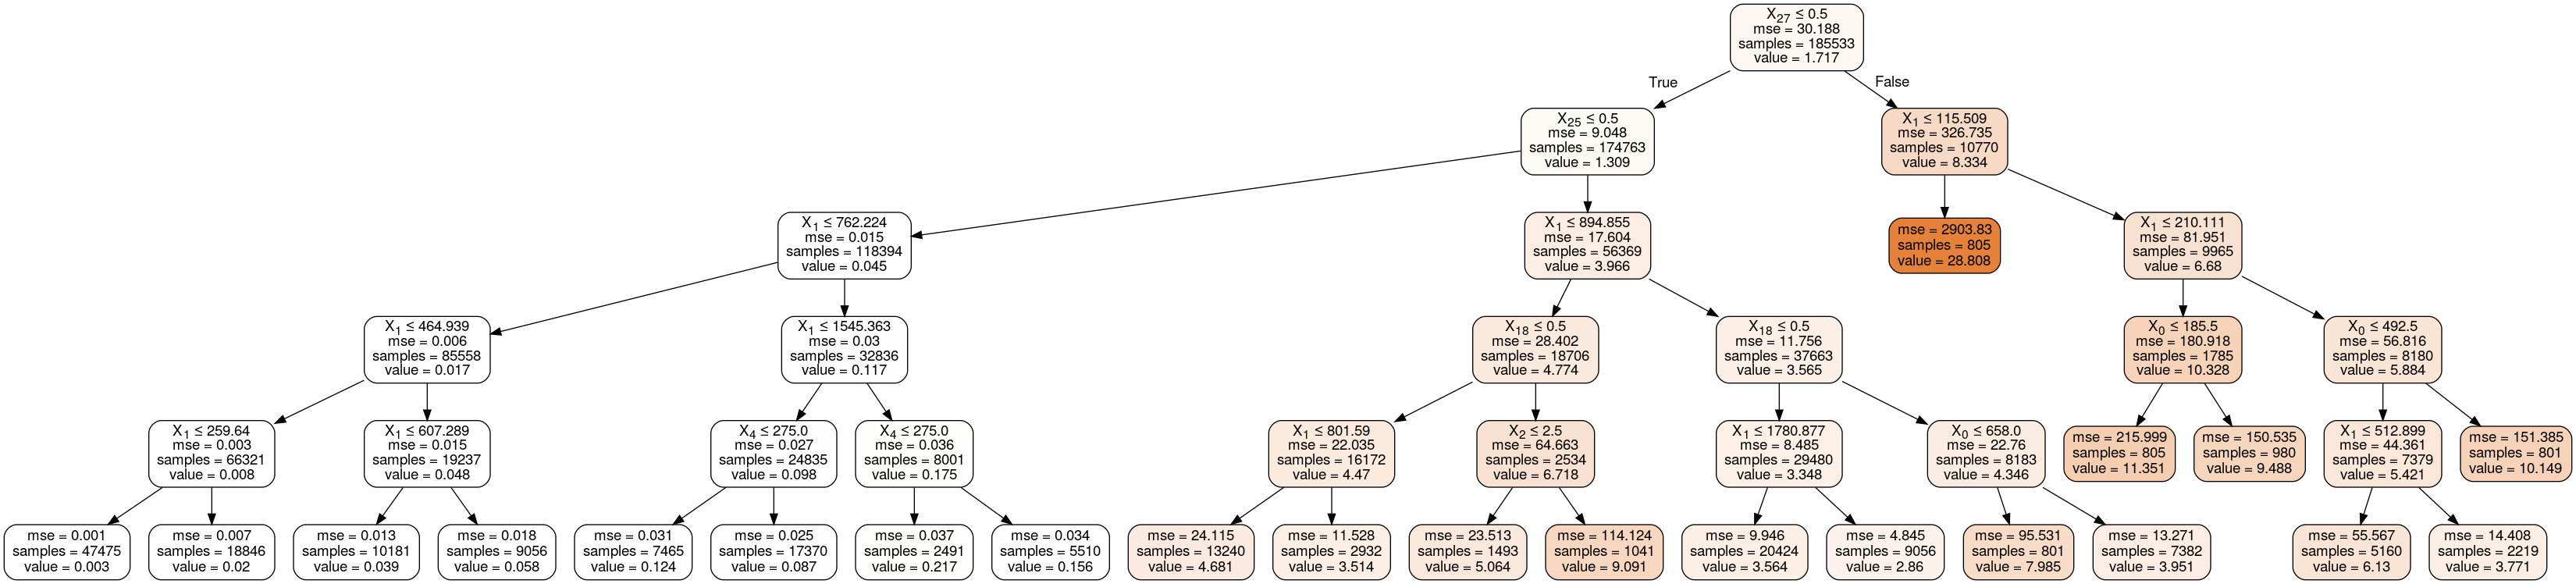

In [35]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [36]:
dtree.best_estimator_.tree_

In [37]:
def tree_to_code(tree, feature_names, Y):
    tree_ = dtree.best_estimator_.tree_
    feature_name = [
        feature_names[i] 
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != tree_.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent], tree_.value[node])
    recurse(0, 1, 0)

In [38]:
dtree.best_estimator_.tree_.__getstate__()['nodes']

array([( 1, 32, 27,  5.00000000e-01, 3.01877147e+01, 185533, 185533.),
       ( 2, 17, 25,  5.00000000e-01, 9.04834630e+00, 174763, 174763.),
       ( 3, 10,  1,  7.62223755e+02, 1.46936047e-02, 118394, 118394.),
       ( 4,  7,  1,  4.64938599e+02, 5.98428895e-03,  85558,  85558.),
       ( 5,  6,  1,  2.59640076e+02, 2.86897170e-03,  66321,  66321.),
       (-1, -1, -2, -2.00000000e+00, 1.06911079e-03,  47475,  47475.),
       (-1, -1, -2, -2.00000000e+00, 7.18939164e-03,  18846,  18846.),
       ( 8,  9,  1,  6.07288696e+02, 1.54902376e-02,  19237,  19237.),
       (-1, -1, -2, -2.00000000e+00, 1.28911094e-02,  10181,  10181.),
       (-1, -1, -2, -2.00000000e+00, 1.82145800e-02,   9056,   9056.),
       (11, 14,  1,  1.54536340e+03, 3.01630096e-02,  32836,  32836.),
       (12, 13,  4,  2.75000000e+02, 2.70156777e-02,  24835,  24835.),
       (-1, -1, -2, -2.00000000e+00, 3.10060939e-02,   7465,   7465.),
       (-1, -1, -2, -2.00000000e+00, 2.49033469e-02,  17370,  17370.),
      

In [39]:
def get_rules(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        '''
        Traverase an skl decision tree from a node (presumably a leaf node)
        up to the top, building the decision rules. The rules should be
        input as an empty list, which will be modified in place. The result
        is a nested list of tuples: (feature, direction (left=-1), threshold).  
        The "tree" is a nested list of simplified tree attributes:
        [split feature, split threshold, left node, right node]
        '''
        # now find the node as either a left or right child of something
        # first try to find it as a left node            

        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)
        
    return (rules_list, values_path)

In [40]:
a,b=get_rules(dtree.best_estimator_, df)

In [41]:
a[0][0]

'Quadrant_LowTenure-HighLR <= 0.5'

In [42]:
len(b)

22

In [43]:
print a[0][0].split(" ",1)[1] 


<= 0.5


In [44]:
obs=pd.DataFrame(index=range(len(a)),columns=df.columns)

In [45]:
obs.columns

Index([u'Duration', u'TotalEarnedPremium', u'Currentage', u'CopayPct',
       u'Deductible', u'PetType_Cat', u'PetType_Dog', u'PetType_PPCAT001',
       u'PetType_PPDOG001', u'PolicyForm_10000', u'PolicyForm_15000',
       u'PolicyForm_20000', u'PolicyForm_2500', u'PolicyForm_25000',
       u'PolicyForm_5000', u'PolicyForm_Bronze', u'PolicyForm_Gold',
       u'PolicyForm_Silver', u'PolicyForm_Unlimited', u'CarrierCd_AGR',
       u'CarrierCd_ALZ', u'CarrierCd_CAN', u'CarrierCd_XLC', u'Country_CAN',
       u'Country_US', u'Quadrant_HighTenure-HighLR',
       u'Quadrant_HighTenure-LowLR', u'Quadrant_LowTenure-HighLR',
       u'Quadrant_LowTenure-LowLR'],
      dtype='object')

In [46]:
obs['Value']=np.zeros(len(obs))

In [47]:
a[0][0].split(" ",1)[0]

'Quadrant_LowTenure-HighLR'

In [56]:
a[0][0].split(" ",1)[1]

'<= 0.5'

In [48]:
b[20][-1][0][0]

3.770542623395799

In [49]:
obs.loc[5][a[0][0].split(" ",1)[0]]

nan

In [50]:
obs.columns

Index([u'Duration', u'TotalEarnedPremium', u'Currentage', u'CopayPct',
       u'Deductible', u'PetType_Cat', u'PetType_Dog', u'PetType_PPCAT001',
       u'PetType_PPDOG001', u'PolicyForm_10000', u'PolicyForm_15000',
       u'PolicyForm_20000', u'PolicyForm_2500', u'PolicyForm_25000',
       u'PolicyForm_5000', u'PolicyForm_Bronze', u'PolicyForm_Gold',
       u'PolicyForm_Silver', u'PolicyForm_Unlimited', u'CarrierCd_AGR',
       u'CarrierCd_ALZ', u'CarrierCd_CAN', u'CarrierCd_XLC', u'Country_CAN',
       u'Country_US', u'Quadrant_HighTenure-HighLR',
       u'Quadrant_HighTenure-LowLR', u'Quadrant_LowTenure-HighLR',
       u'Quadrant_LowTenure-LowLR', u'Value'],
      dtype='object')

In [70]:
for i in range(len(a)):
    for k in range(len(a[i])):
        obs.set_value(i,a[i][k].split(" ",1)[0],a[i][k].split(" ",1)[1]) 
    obs.set_value(i,'Value',b[i][-1][0][0])
obs.dropna(axis=1,how='all',inplace=True)



/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [71]:
obs

,Duration,TotalEarnedPremium,Currentage,Deductible,PolicyForm_Unlimited,Quadrant_HighTenure-HighLR,Quadrant_LowTenure-HighLR,Value
0,NaN,<= 259.640075684,NaN,NaN,NaN,<= 0.5,<= 0.5,0.002892
1,NaN,> 259.640075684,NaN,NaN,NaN,<= 0.5,<= 0.5,0.020167
2,NaN,<= 607.288696289,NaN,NaN,NaN,<= 0.5,<= 0.5,0.038608
3,NaN,> 607.288696289,NaN,NaN,NaN,<= 0.5,<= 0.5,0.057934
4,NaN,<= 1545.36340332,NaN,<= 275.0,NaN,<= 0.5,<= 0.5,0.123543
5,NaN,<= 1545.36340332,NaN,> 275.0,NaN,<= 0.5,<= 0.5,0.087183
6,NaN,> 1545.36340332,NaN,<= 275.0,NaN,<= 0.5,<= 0.5,0.216800
7,NaN,> 1545.36340332,NaN,> 275.0,NaN,<= 0.5,<= 0.5,0.155545
8,NaN,<= 801.589599609,NaN,NaN,<= 0.5,> 0.5,<= 0.5,4.681356
9,NaN,> 801.589599609,NaN,NaN,<= 0.5,> 0.5,<= 0.5,3.513903


In [72]:
obs.to_csv("/home/jash/Desktop/petplan/CART/observations.xlsx")